# Hockey Data Analysis using Python

In this project I analyze hockey game data using Python and several Python libraries. 

The goal of this project is to demonstrate my data analysis, coding, and problem solving skills using Python. I do this by solving several tasks with varying complexity. 

Libraries:
- I will be using a number of Python libraries such as numpy, pandas, plotly/matplotlib, and sklearn

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Task 1
### a) Who won the game & what was the score?
### b) Who won the Expected Goals (xg) battle & what was each team's total xg?
### c) What do these two answers tell us about how the two teams played?

## Solution
### a) The team with teamid 596 won the game and the score was 4 - 1 [Output Below]
### b) The team with teamid 596 won the xG battle. Team with teamid 596 has an xG of 4.628315 and Team with teamid 724 has an xG of 2.989537. [Output Below]
### c)  The conclusion I can draw from my answers above is that Team 596 only slightly played better than Team 724. From simply looking at the score we see that Team 596 outscored Team 724 four to one. This may look like 596 dominated but if we look more into the data that may not be the case. When we look at both the team’s Expected Goals, we see that Team 596 again out did Team 724 again by 1.638778. Expected Goals or xG is the quality of shots each team took by measuring the probability of an unblocked shot to become a goal. This gives us the expected goals a team should have scored given its quality of shots. If we dig a bit deeper, we do see that Team 724 did underperform as the number of goals they actually scored , 1, is less than their expected number of goals of 3. This means that Team 724 had very good quality of shots on net but were unable to capitalize and get the puck to the back of the net. It could also be that the goalie of Team 596 was playing very well and was able to save high quality shot attempts. Overall, this means that Team 724 played a lot better then what the score may imply.  

In [3]:
# Part A)

df = pd.read_csv("./nhl_gameid61_df.csv") # Ensure that the Jupyter file is in the same directory as the CSV file

goals_by_team = df.groupby('teamid')['goal'].sum()

print(goals_by_team) # The team with teamid 596 won the game and the score was 4 - 1

teamid
596    4
724    1
Name: goal, dtype: int64


In [18]:
# Part B)

dfxg = pd.read_csv("./nhl_gameid61_xG_df.csv") # Ensure that the Jupyter file is in the same directory as the CSV file

combined_df = pd.merge(dfxg, df, on='compiledgametime', how='left') #If an xg value doesn't correspond to a shot event, it should not be counted

combined_df.head() # now we know if an xg corresponds to a shot event, the ones that don't will be filtered out.

,teamid_x,compiledgametime,playerid_x,xg,gameid,teamid_y,opposingteamid,playerid_y,eventname,outcome,...,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance
0,724,33.30,628757,0.134104,70632.0,724.0,596.0,628757.0,shot,successful,...,oz,72.126389,0.748905,5.0,5.0,0.0,0.0,0.0,0.0,16.890223
1,724,35.10,838211,0.188982,70632.0,724.0,596.0,838211.0,shot,successful,...,oz,79.167564,7.287140,5.0,5.0,0.0,0.0,0.0,0.0,12.238431
2,724,60.30,628757,0.092400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,724,68.20,288890,0.039566,70632.0,724.0,596.0,288890.0,shot,successful,...,oz,78.161682,-17.859921,5.0,5.0,0.0,0.0,0.0,0.0,20.891288
4,724,74.82,288890,0.066700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_shot = combined_df[combined_df['eventname'] == 'shot'] # filter for data where eventname = 'shot'

total_xg_by_teamid = df_shot.groupby('teamid_x')['xg'].sum() # group by teamid and sum xg

print(total_xg_by_teamid)

teamid_x
596    4.628315
724    2.989537
Name: xg, dtype: float64

## Task 2
### a) Which possessionid had the highest total successful passes? 
### b) How many successful passes were there and why do you think this specific possession had so many?

## Solution
### a) Possessionid 417 had the most amount of successful passes
### b) Poessionid 417 had 8 successful passes. This specific possession had so many successful passes because the team with possession was on a powerplay and had one extra man. Furthermore, since the score difference was -3 for the team with possession, they were most likely under pressure to perform and close the lead. Thus, they were extra sharp in their passes and were able to complete more passes. 

In [53]:
# Part A) and Part B)

succ_passes = df[(df['eventname'] == 'pass') & (df['outcome'] == 'successful')]

passes_per_possession = succ_passes[succ_passes['eventname'] == 'pass'].groupby('possessionid').size().reset_index(name='pass_count')

pass_count = passes_per_possession.sort_values('pass_count', ascending=False)

pass_count.head()

,possessionid,pass_count
226,417,8
54,111,6
140,262,6
90,175,6
96,189,6


## Task 3
### a) Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each blueline?

## Solution
### a) For the left blue line the likely xcoord is 25.57, for the center ice red line the likely xcoord is 0.04, and for the right blue line the likely xcoord is 25.49

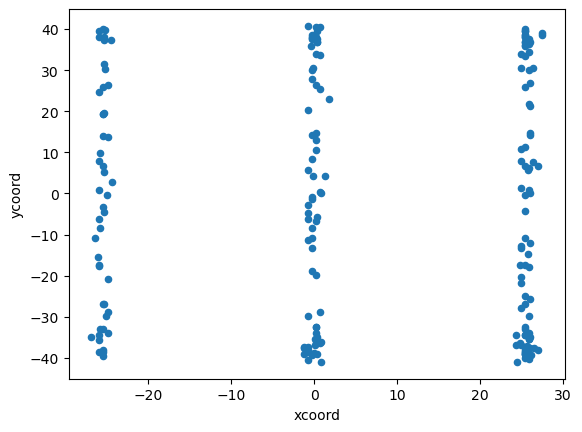

In [65]:
# Part A)

blue_line = df[(df['eventname'] == 'linecarry')]

plot = blue_line.plot(x='xcoord', y='ycoord', kind='scatter')

In [71]:
right_line = blue_line[(blue_line['xcoord'] > 10)]
avg_right_line = right_line['xcoord'].mean()

print(round(avg_right_line, 2))

left_line = blue_line[(blue_line['xcoord'] < -10)]
avg_left_line = left_line['xcoord'].mean()

print(round(avg_left_line, 2))

mid_line = blue_line[(blue_line['xcoord'] >= -10) & (blue_line['xcoord'] <= 10)]
avg_mid_line = mid_line['xcoord'].mean()

print(round(avg_mid_line, 2))


25.57
-25.49
-0.04


## Task 4
### a) Create a subset of all shot attempts in the game and then with the plotting library of your choice, produce one scatter plot per team to illustrate where their shots were located and highlight any goals that were scored.
### b) Describe in 2-4 sentences your findings for each team.

## Solution
### a) [Look at output below]
### b) From looking at both the shot charts and knowing the blue line is at xcoord = 25, it is clear that both teams took all their shots in the offensive zone and scored their goals close to the net. Surprisingly, Team 596 was able to score a goal from their own defensive zone. This was most likely an empty netter. 

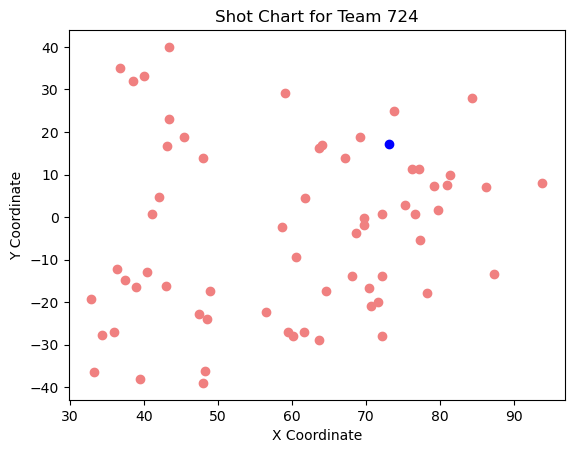

In [144]:
# Part A) 

# For team with teamid 724:

team724 = df[(df['eventname'] == 'shot') & (df['teamid'] == 724)]

df_goal_1 = team724[team724['goal'] == 1]
df_goal_0 = team724[team724['goal'] == 0]

plt.scatter(df_goal_0['xcoord'], df_goal_0['ycoord'], color='lightcoral')
plt.scatter(df_goal_1['xcoord'], df_goal_1['ycoord'], color='blue')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Shot Chart for Team 724')
plt.figsize=(20, 10)

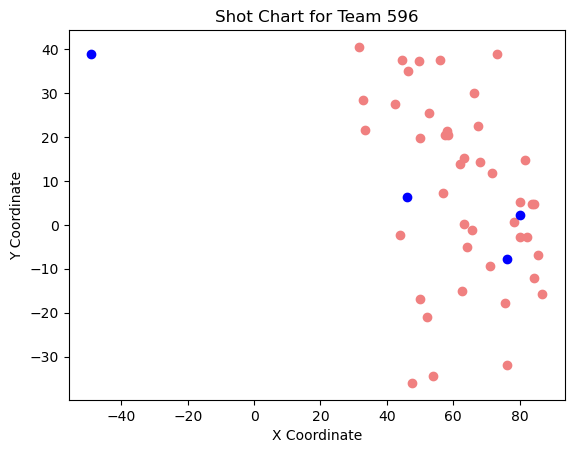

In [143]:
# For team with teamid 596:

team596 = df[(df['eventname'] == 'shot') & (df['teamid'] == 596)]

df_goal_1 = team596[team596['goal'] == 1]
df_goal_0 = team596[team596['goal'] == 0]

plt.scatter(df_goal_0['xcoord'], df_goal_0['ycoord'], color='lightcoral')
plt.scatter(df_goal_1['xcoord'], df_goal_1['ycoord'], color='blue')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Shot Chart for Team 596')
plt.figsize=(20, 10)


## Task 5
### a) If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the distance from each shot to this point. What is the distance of the furthest goal scored in the game?
### b) What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg value?

## Solution
### a) Look at output below for new 'distance' column', the farthest goal scored in the was from around 143 ft away.
### b) The xG of the farthest goal is 0.004219, this is fairly low, and is most likely due to the fact that it was shot from the teams own defensive zone. This is all the way across the rink. The overall quality of this shot was bad. 

In [9]:
# Part A)

x = 89
y = 0

shots = df[(df['eventname'] == 'shot') & (df['outcome'] == 'successful')]

shots['distance'] = np.sqrt((shots['xcoord'] - x)**2 + (shots['ycoord'] - y)**2)

shots.head()

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance
16,70632,724,596,406.13333,698619,shot,successful,outside,66,oz,43.188061,16.619492,5,5,0,0,0,0,48.733369
20,70632,596,724,2077.86670,812630,shot,successful,slot,312,oz,71.615578,11.820587,5,5,0,0,0,3,21.022474
45,70632,596,724,1026.56670,828703,shot,successful,outside,160,oz,50.096191,19.864708,5,4,0,0,0,2,43.681952
47,70632,596,724,2468.10000,797810,shot,successful,slot,375,oz,84.241180,4.776470,5,5,0,0,0,3,6.742480
50,70632,724,596,1403.63330,183489,shot,successful,slot,218,oz,69.710892,-0.252941,5,5,0,0,0,-2,19.290767


In [21]:
only_goals = shots[(shots['goal'] == 1)]

farthest_goal = only_goals['distance'].max()

farthest_goal

143.486326655975

In [22]:
# Part B)

combined_df['distance'] = np.sqrt((combined_df['xcoord'] - x)**2 + (combined_df['ycoord'] - y)**2)
combined_df.head()

,teamid_x,compiledgametime,playerid_x,xg,gameid,teamid_y,opposingteamid,playerid_y,eventname,outcome,...,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance
0,724,33.30,628757,0.134104,70632.0,724.0,596.0,628757.0,shot,successful,...,oz,72.126389,0.748905,5.0,5.0,0.0,0.0,0.0,0.0,16.890223
1,724,35.10,838211,0.188982,70632.0,724.0,596.0,838211.0,shot,successful,...,oz,79.167564,7.287140,5.0,5.0,0.0,0.0,0.0,0.0,12.238431
2,724,60.30,628757,0.092400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,724,68.20,288890,0.039566,70632.0,724.0,596.0,288890.0,shot,successful,...,oz,78.161682,-17.859921,5.0,5.0,0.0,0.0,0.0,0.0,20.891288
4,724,74.82,288890,0.066700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
filtered = combined_df[(combined_df['distance'] == farthest_goal)]
xg_filtered = filtered['xg']
print(xg_filtered) 

34    0.004219
Name: xg, dtype: float64


## Task 6
### a) If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had the most assisted shots in the game and how many assisted shots did they have?

## Solution
### a) The player with playerid 797810 had the most assisted shots with 3 assisted shots.

In [147]:
# Lets first filter for data with only successful outcomes. As we are only looking at consecutive
# successful passes, successful receptions and successful shots on net

only_succ = df[(df['outcome'] == 'successful')]

# Next, we will order the compiledgametime from smallest to largest, this will give us ordered data
# This will allow us to see the order of events in order.

df_sorted = only_succ.sort_values('compiledgametime')
df_sorted = df_sorted.reset_index()
df_sorted['shot_assist'] = 0

df_sorted.head()

,index,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,...,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
0,1585,70632,724,596,0.066667,183489,pass,successful,south,0,...,0.708740,0.748905,5,5,0,0,0,0,88.294436,0
1,61,70632,724,596,1.000000,673651,reception,successful,regular,0,...,-20.917725,11.813610,5,5,0,0,0,0,110.550747,0
2,80,70632,724,596,2.266667,673651,pass,successful,outlet,0,...,-33.491257,9.801846,5,5,0,0,0,0,122.882807,0
3,84,70632,724,596,3.033333,698619,reception,successful,regular,0,...,-35.000076,-37.977570,5,5,0,0,0,0,129.685445,0
4,98,70632,724,596,3.600000,698619,linecarry,successful,none,0,...,-25.947144,-38.480507,5,5,0,0,0,0,121.217141,0


In [219]:
# Now we need to find and identify shots that have a 'reception' and 'pass' before them. They also have to have the same
# possessionid as the shot. 

# Example of what we are looking for
# eventname        outcome          possessionid     teamid    shotassist
#  pass           successful              2            724          0
# reception       successful              2            724          0
#  shot           successful              2            724          1

# The above shot was identifed as a shot assist because it had a successful reception and shot before it, with the 
# same possessionid

for i, row in df_sorted.iterrows():
    if row['eventname'] == 'shot'\
    and df_sorted.loc[i-1, 'eventname'] == 'reception'\
    and df_sorted.loc[i-2, 'eventname'] == 'pass'\
    and df_sorted.loc[i-1, 'possessionid'] == row['possessionid']\
    and df_sorted.loc[i-2, 'possessionid'] == row['possessionid']:
        df_sorted.at[i, 'shot_assist'] = 1
    else:
        df_sorted.at[i, 'shot_assist'] = 0
        

shot_assist = df_sorted[(df_sorted['shot_assist'] == 1)] #Look at output below for new column
                
shot_assist.head()

,index,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,...,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
28,543.0,70632.0,724.0,596.0,68.20000,288890.0,shot,successful,outside,11.0,...,78.161682,-17.859921,5.0,5.0,0.0,0.0,0.0,0.0,20.891288,1.0
37,653.0,70632.0,724.0,596.0,87.80000,677394.0,shot,successful,slot,13.0,...,71.623451,-19.871681,5.0,5.0,0.0,0.0,0.0,0.0,26.397503,1.0
89,290.0,70632.0,724.0,596.0,235.26666,838211.0,shot,successful,slot,33.0,...,79.670509,1.754787,5.0,5.0,0.0,0.0,0.0,0.0,9.493086,1.0
109,745.0,70632.0,724.0,596.0,298.43332,677394.0,shot,successful,slot,46.0,...,64.582275,-17.356979,5.0,5.0,0.0,0.0,0.0,0.0,29.958138,1.0
141,16.0,70632.0,724.0,596.0,406.13333,698619.0,shot,successful,outside,66.0,...,43.188061,16.619492,5.0,5.0,0.0,0.0,0.0,0.0,48.733369,1.0


In [210]:
player_assisted_shots = (shot_assist.groupby('playerid')['shot_assist'].sum())
sorted_as = player_assisted_shots.sort_values(ascending=False)
sorted_as.head()

playerid
797810.0    3.0
698619.0    3.0
154967.0    2.0
511560.0    2.0
677394.0    2.0
Name: shot_assist, dtype: float64

## Task 7
### a) What is highest xg among the goals that were scored and why do you think it was this high? 
### b) Did this goal have a shot assist?

## Solution
### a) The goal scored by team 594 at game time 3553 had the highest xg. It was late in the game and the other team pulled their goalie for an extra man. 
### b) This goal does not have a shot assist.

In [227]:
# Part A) and Part B): Look to output

combined_xg = pd.merge(dfxg, df_sorted, on='compiledgametime', how='left')

goal_xg = combined_xg [(combined_xg ['goal'] == 1)]

goal_xg.sort_values('xg', ascending=False)

,teamid_x,compiledgametime,playerid_x,xg,index,gameid,teamid_y,opposingteamid,playerid_y,eventname,...,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
59,596,3553.50000,290779,0.999535,1323.0,70632.0,596.0,724.0,290779.0,shot,...,46.072662,6.285294,4.0,6.0,1.0,0.0,1.0,2.0,43.385035,0.0
18,596,793.26666,797810,0.484870,992.0,70632.0,596.0,724.0,797810.0,shot,...,80.266541,2.261765,5.0,5.0,1.0,0.0,0.0,1.0,9.021579,1.0
16,596,675.66670,424862,0.125413,1156.0,70632.0,596.0,724.0,424862.0,shot,...,76.243011,-7.797058,5.0,5.0,1.0,0.0,0.0,0.0,14.951083,1.0
55,724,3424.83330,698619,0.087426,249.0,70632.0,724.0,596.0,698619.0,shot,...,73.132271,17.066551,6.0,5.0,1.0,1.0,0.0,-3.0,23.303476,1.0
34,596,1808.00000,797810,0.004219,954.0,70632.0,596.0,724.0,797810.0,shot,...,-49.090302,38.979412,4.0,5.0,1.0,0.0,0.0,2.0,143.486327,0.0


## Task 8
### a) Consider other shots with high xg values, without engineering any additional features (aside from the columns you've already been asked to create in the questions above), use a statistical technique of your choice to show the highest predictors of a goal within this dataset.
### b) Please explain your reasoning for choosing this technique and explain your findings

### Hint: look back at the columns you were asked to create, along with the columns already provided in the event dataset, what would lead to dangerous shot attempts?

## Solution
### a) [Look at output below]
### b) The statistical technique I used to find the highest predictors of a goal was running a linear regression. I ran a linear regression where distance was my independent variable and xG was my dependent variable. To me it was clear that distance of the shot was a very good predictor of expected goals, as the closer the teams shot to the net, the higher the xG was. From my linear regression, I was able to find the line of best fit. This let me build a formula and incorporate it into a function to predict xG given distance. This function can be used to easily predict the xG of the shot given the distance it was shot from.

In [250]:
highest_xg = combined_xg.sort_values('xg', ascending=False)
highest_xg.head()

,teamid_x,compiledgametime,playerid_x,xg,index,gameid,teamid_y,opposingteamid,playerid_y,eventname,...,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,shot_assist
59,596,3553.50000,290779,0.999535,1323.0,70632.0,596.0,724.0,290779.0,shot,...,46.072662,6.285294,4.0,6.0,1.0,0.0,1.0,2.0,43.385035,0.0
36,596,2014.13330,511560,0.503786,1220.0,70632.0,596.0,724.0,511560.0,shot,...,83.686165,4.779411,5.0,5.0,0.0,0.0,0.0,3.0,7.147001,1.0
18,596,793.26666,797810,0.484870,992.0,70632.0,596.0,724.0,797810.0,shot,...,80.266541,2.261765,5.0,5.0,1.0,0.0,0.0,1.0,9.021579,1.0
9,724,235.26666,838211,0.406377,290.0,70632.0,724.0,596.0,838211.0,shot,...,79.670509,1.754787,5.0,5.0,0.0,0.0,0.0,0.0,9.493086,1.0
35,724,1836.50000,890686,0.361430,1547.0,70632.0,724.0,596.0,890686.0,shot,...,81.272430,9.805881,5.0,5.0,0.0,0.0,0.0,-3.0,12.484817,1.0


0.2071998576391454 -0.002374276932096722


Text(0, 0.5, 'xG')

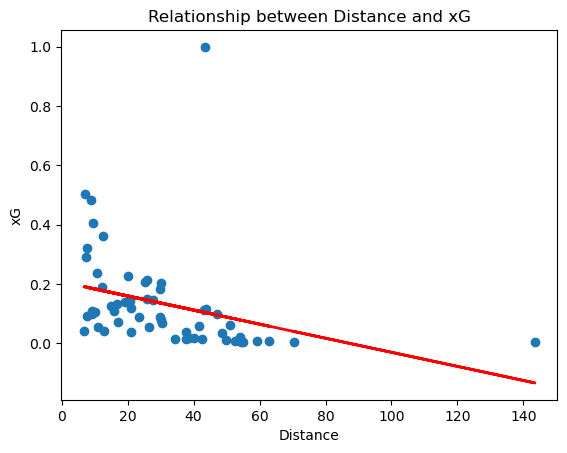

In [270]:
highest_xg = highest_xg.dropna()

X = highest_xg[['distance']] # independent variable 
y = highest_xg['xg'] # dependent variable, the value of xG is dependent on what distance the shot was taken from

lr.fit(X, y)

y0 = lr.intercept_
slope = lr.coef_[0]

print(y0, slope) # We have a formula for our linear regression y = -0.002374276932096722(x) + 0.2071998576391454

plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red', linewidth=2)
plt.title('Relationship between Distance and xG')
plt.xlabel('Distance')
plt.ylabel('xG')

# The relationship between distance of shot and xG is below. The smaller the distance, the higher the xG. 

In [264]:
# We can use our linear regression formula to predict the xG of a shot by simply inputing a value for x, which is distance

# Function to predict the xG of the shot, given the distance. 
def xg_predictor(distance):
    
    xg = (slope * distance) + y0
    
    return xg

# We can use this function to predict the xG of a shot given a distance